# 1. Gompertz Model

In [1]:
import pandas as pd
base_path = "/kaggle/input/hust-preprocessed-data/"
gcycles_path = base_path+"gompertz-parameters-per-cycle/"
df_hust_gompertz = pd.read_csv("/kaggle/input/hust-preprocessed-data/hust_gompertz_params.csv")

df_hust_gompertz.head()

,file,k,a,b,rul,SoH_above_80,SoH,norm_SoH
0,9-3.csv,0.982997,-3.780097,-13.953564,1905,0.171740,0.971740,0.971740
1,5-6.csv,0.992200,-3.234754,-8.788365,2460,0.165901,0.965901,0.965901
2,8-5.csv,0.944335,-4.248934,-22.640842,1348,0.137523,0.937523,0.937523
3,8-1.csv,0.945628,-4.333303,-23.960673,1308,0.140427,0.940427,0.940427
4,7-2.csv,0.983036,-3.608114,-11.879995,2030,0.168921,0.968921,0.968921


In [2]:
df_hust_gompertz[df_hust_gompertz['file']=='2-2.csv']

,file,k,a,b,rul,SoH_above_80,SoH,norm_SoH
66,2-2.csv,0.983328,-3.811998,-10.046907,2651,0.182448,0.982448,0.982448


In [3]:
df_eg = pd.read_csv(gcycles_path+'2-2-hust_gompertz_params.csv')

df_eg.iloc[::100].head(20)

,Cycle number,k,a,b,rul,max_SoC_above_80,SoH,gompertz-value,gompertz-1st-derivative-value,gompertz-2nd-derivative-value
0,1,1.625764,-0.685705,1.000169,2651,31.898799,0.982448,1.104691,0.426938,-0.262008
100,101,1.477715,-0.888275,-3.264020,2551,31.898799,0.966711,0.573844,-1.771697,-0.312880
200,201,1.605398,-0.701069,-1.971447,2451,31.898799,0.959135,0.718306,-1.138874,-0.439544
300,301,3.375345,0.215760,-0.635919,2351,31.898799,0.955038,0.798997,-0.732115,0.205266
400,401,3.791697,0.306308,-0.500312,2251,31.898799,0.950334,0.829014,-0.630582,0.164158
500,501,4.138502,0.369401,-0.426240,2151,31.898799,0.946009,0.847503,-0.572852,0.143035
600,601,4.475684,0.422620,-0.377123,2051,31.898799,0.941357,0.860700,-0.535141,0.130911
700,701,4.697030,0.454080,-0.350960,1951,31.898799,0.936539,0.869884,-0.514825,0.124007
800,801,4.798417,0.467738,-0.338696,1851,31.898799,0.931727,0.876886,-0.504796,0.119623
900,901,4.886033,0.479099,-0.331799,1751,31.898799,0.925454,0.882653,-0.501149,0.118260


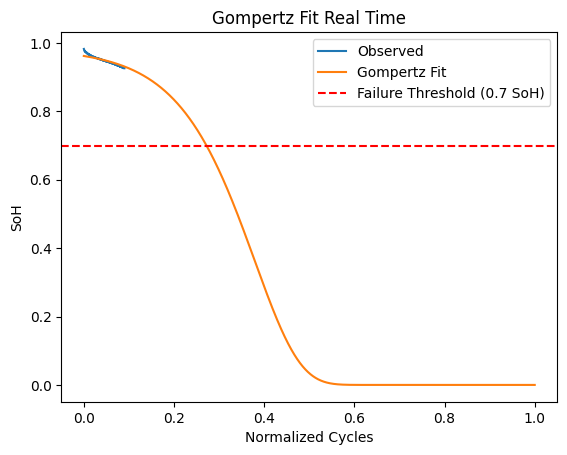

In [4]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

threshold = 900

#Gompertz func
def gompertz_func(x,k,a,b):
    return k*np.exp(-np.exp(a-(b*x)))


x_data = np.array(df_eg['Cycle number'][:threshold].to_list())/10000.0
y_data = np.array(df_eg['SoH'][:threshold].to_list())


# Check input length
assert len(x_data) >= 3 and len(y_data) >= 3, "Need at least 3 data points"

# Initial guess
p0 = [0.983328,-3.811998,-10.046907]

# Fit the curve
#popt, _ = curve_fit(gompertz, x_data, y_data, p0=p0, maxfev=10000)
popt = np.array(p0)#,# _ = curve_fit(gompertz, x_data, y_data, p0=p0, maxfev=10000)
# Predict
x_future = np.linspace(0, 1, 10000)
y_pred = gompertz_func(x_future, *popt)

# Plot
plt.plot(x_data, y_data, label='Observed')
plt.plot(x_future, y_pred, '-', label='Gompertz Fit')
# plt.axhline(0.02, color='red', linestyle='--', label='Threshold')
# plt.legend()
plt.xlabel("Normalized Cycles")
plt.ylabel("SoH")
plt.axhline(y=0.7, color='r', linestyle='--', label=f'Failure Threshold (0.7 SoH)')
plt.title("Gompertz Fit Real Time")
plt.grid(False)
plt.legend()
plt.show()

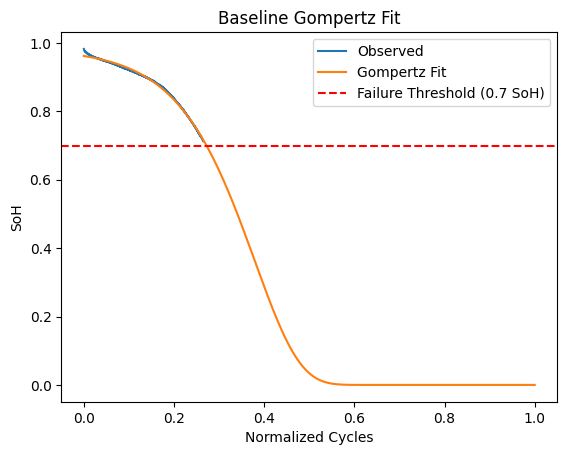

In [5]:
x_data = np.array(df_eg['Cycle number'].to_list())/10000.0
y_data = np.array(df_eg['SoH'].to_list())


# Check input length
assert len(x_data) >= 3 and len(y_data) >= 3, "Need at least 3 data points"

# Initial guess
p0 = [0.983328,-3.811998,-10.046907]

# Fit the curve
#popt, _ = curve_fit(gompertz, x_data, y_data, p0=p0, maxfev=10000)
popt = np.array(p0)#,# _ = curve_fit(gompertz, x_data, y_data, p0=p0, maxfev=10000)
# Predict
x_future = np.linspace(0, 1, 10000)
y_pred = gompertz_func(x_future, *popt)

# Plot
plt.plot(x_data, y_data, label='Observed')
plt.plot(x_future, y_pred, '-', label='Gompertz Fit')
# plt.axhline(0.02, color='red', linestyle='--', label='Threshold')
plt.xlabel("Normalized Cycles")
plt.ylabel("SoH")
plt.axhline(y=0.7, color='r', linestyle='--', label=f'Failure Threshold (0.7 SoH)')
plt.title("Baseline Gompertz Fit")
plt.grid(False)
plt.legend()
plt.show()

In [6]:
def inverse_gompertz_func(y,k,a,b):
    return (a - np.log(np.log(k/y)))/b

print(f"Estimated RUL (cycle count to reach 70% SoH): {inverse_gompertz_func(0.7,*popt)*10000:.2f} cycles")

Estimated RUL (cycle count to reach 70% SoH): 2720.02 cycles


In [7]:
import numpy as np
from sklearn.metrics import root_mean_squared_error

#mse = mean_squared_error([2468], [2501])
#rmse = np.sqrt(mse)
rmse = root_mean_squared_error([2468], [2501])
rmse

33.0

## 1. a hust target values

In [8]:
df_hust_gompertz.head()

,file,k,a,b,rul,SoH_above_80,SoH,norm_SoH
0,9-3.csv,0.982997,-3.780097,-13.953564,1905,0.171740,0.971740,0.971740
1,5-6.csv,0.992200,-3.234754,-8.788365,2460,0.165901,0.965901,0.965901
2,8-5.csv,0.944335,-4.248934,-22.640842,1348,0.137523,0.937523,0.937523
3,8-1.csv,0.945628,-4.333303,-23.960673,1308,0.140427,0.940427,0.940427
4,7-2.csv,0.983036,-3.608114,-11.879995,2030,0.168921,0.968921,0.968921


In [9]:
# import sklearn
# help(sklearn.metrics)

In [10]:
list_of_pred_rul = [] #store predicted rul in a list
list_of_rmse = [] #store rmses
print('File : k   a   b   RUL   PRED_RUL     RMSE')
for i, row in df_hust_gompertz.iterrows():
    file,k,a,b,rul = row['file'],row['k'],row['a'],row['b'],row['rul']
    pred_rul = inverse_gompertz_func(0.7,k,a,b)*10000
    list_of_pred_rul.append(pred_rul)
    rmse = root_mean_squared_error([rul], [pred_rul])
    
    list_of_rmse.append(rmse)
    print(file,' : ',k,a,b, rul,pred_rul,rmse)

df_hust_gompertz['gompertz_predicted_rul'] = list_of_pred_rul
df_hust_gompertz['predicted_rul_rmse'] = list_of_rmse

File : k   a   b   RUL   PRED_RUL     RMSE
9-3.csv  :  0.982996710370978 -3.780096777394503 -13.953563953778795 1905 1934.9109525608494 29.91095256084941
5-6.csv  :  0.9921996111545596 -3.2347540532801764 -8.788364964363595 2460 2482.3997824259477 22.399782425947706
8-5.csv  :  0.9443346580175198 -4.248934304346764 -22.640842325590288 1348 1344.013789366012 3.986210633988094
8-1.csv  :  0.9456276967857268 -4.333303170593512 -23.960673498137517 1308 1307.0956017467518 0.904398253248246
7-2.csv  :  0.9830361981621258 -3.608114072626324 -11.879995414587295 2030 2127.9688117788464 97.96881177884643
7-6.csv  :  0.9417780029108302 -4.459192978448658 -22.763033460453133 1419 1425.1716435676217 6.171643567621686
8-4.csv  :  0.9514917611225512 -4.194246073166067 -15.876141187795234 1885 1897.9283967923127 12.928396792312697
10-5.csv  :  0.974893214504243 -3.85201260069978 -13.306800422442864 2030 2064.4507963827655 34.450796382765475
4-8.csv  :  0.975866746940688 -3.952479998025472 -16.60350293

In [11]:
df_hust_gompertz['predicted_rul_rmse'].mean(),df_hust_gompertz['predicted_rul_rmse'].median(),df_hust_gompertz['rul'].mean()

(np.float64(27.90447548749285),
 19.422964485473813,
 np.float64(1897.6883116883116))

In [12]:
df_hust_gompertz.head()

,file,k,a,b,rul,SoH_above_80,SoH,norm_SoH,gompertz_predicted_rul,predicted_rul_rmse
0,9-3.csv,0.982997,-3.780097,-13.953564,1905,0.171740,0.971740,0.971740,1934.910953,29.910953
1,5-6.csv,0.992200,-3.234754,-8.788365,2460,0.165901,0.965901,0.965901,2482.399782,22.399782
2,8-5.csv,0.944335,-4.248934,-22.640842,1348,0.137523,0.937523,0.937523,1344.013789,3.986211
3,8-1.csv,0.945628,-4.333303,-23.960673,1308,0.140427,0.940427,0.940427,1307.095602,0.904398
4,7-2.csv,0.983036,-3.608114,-11.879995,2030,0.168921,0.968921,0.968921,2127.968812,97.968812


In [13]:
root_mean_squared_error(df_hust_gompertz['rul'].to_list(),df_hust_gompertz['gompertz_predicted_rul'].to_list())

38.338620818222765

In [14]:
# 1. Calculate your standard RMSE 
rmse = root_mean_squared_error(df_hust_gompertz['rul'], df_hust_gompertz['gompertz_predicted_rul'])

# 2. Calculate the mean of the actual RUL
mean_rul = df_hust_gompertz['rul'].mean()

# 3. Calculate RMSE as a percentage (NRMSE)
nrmse_percent = (rmse / mean_rul) * 100

print(f"RMSE: {rmse}")
print(f"RMSE as % of Mean RUL: {nrmse_percent:.2f}%")

RMSE: 38.338620818222765
RMSE as % of Mean RUL: 2.02%


In [15]:
print(f'Proof of concept rmse : {df_hust_gompertz['predicted_rul_rmse'].mean():.2f} %rmse : {df_hust_gompertz['predicted_rul_rmse'].mean()*100/df_hust_gompertz['rul'].mean():.2f} %')

Proof of concept rmse : 27.90 %rmse : 1.47 %


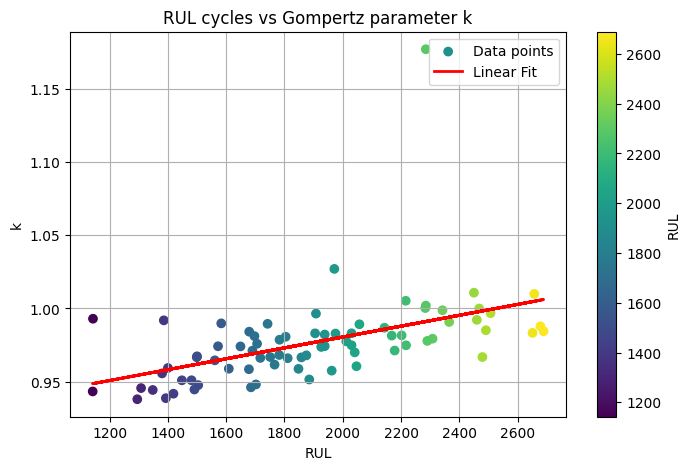

In [16]:
x = df_hust_gompertz['rul']#np.linspace(0, 10, 100)
y = df_hust_gompertz['k']#np.sin(x) + 0.1 * np.random.randn(100)

# Gradient color based on x
colors = x

# Fit a line (1st degree polynomial)
coeffs = np.polyfit(x, y, deg=1)
fit_line = np.poly1d(coeffs)

# Plot
plt.figure(figsize=(8, 5))
scatter = plt.scatter(x, y, c=colors, cmap='viridis', label='Data points')
plt.plot(x, fit_line(x), color='red', linewidth=2, label='Linear Fit')
plt.colorbar(scatter, label='RUL')
plt.xlabel('RUL')
plt.ylabel('k')
plt.title('RUL cycles vs Gompertz parameter k')
plt.legend()
plt.grid(True)
plt.show()

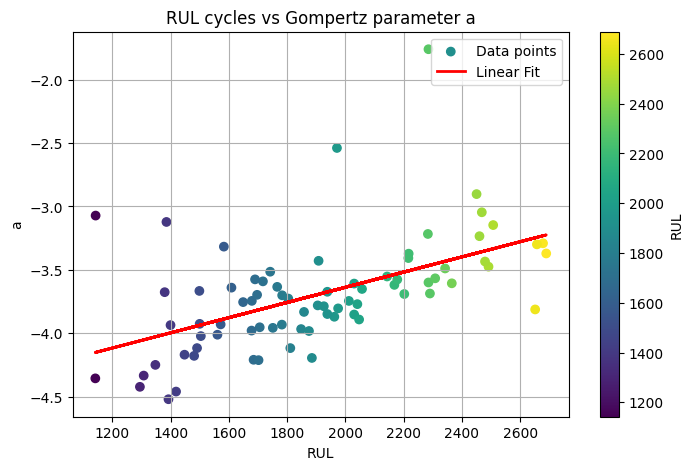

In [17]:
x = df_hust_gompertz['rul']#np.linspace(0, 10, 100)
y = df_hust_gompertz['a']#np.sin(x) + 0.1 * np.random.randn(100)

# Gradient color based on x
colors = x

# Fit a line (1st degree polynomial)
coeffs = np.polyfit(x, y, deg=1)
fit_line = np.poly1d(coeffs)

# Plot
plt.figure(figsize=(8, 5))
scatter = plt.scatter(x, y, c=colors, cmap='viridis', label='Data points')
plt.plot(x, fit_line(x), color='red', linewidth=2, label='Linear Fit')
plt.colorbar(scatter, label='RUL')
plt.xlabel('RUL')
plt.ylabel('a')
plt.title('RUL cycles vs Gompertz parameter a')
plt.legend()
plt.grid(True)
plt.show()

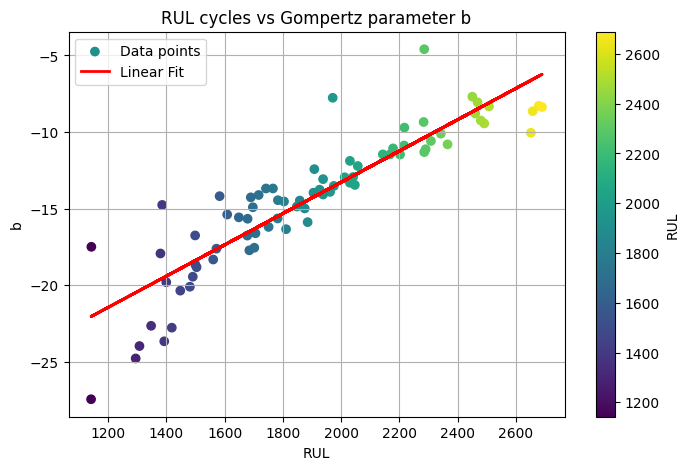

In [18]:
x = df_hust_gompertz['rul']#np.linspace(0, 10, 100)
y = df_hust_gompertz['b']#np.sin(x) + 0.1 * np.random.randn(100)

# Gradient color based on x
colors = x

# Fit a line (1st degree polynomial)
coeffs = np.polyfit(x, y, deg=1)
fit_line = np.poly1d(coeffs)

# Plot
plt.figure(figsize=(8, 5))
scatter = plt.scatter(x, y, c=colors, cmap='viridis', label='Data points')
plt.plot(x, fit_line(x), color='red', linewidth=2, label='Linear Fit')
plt.colorbar(scatter, label='RUL')
plt.xlabel('RUL')
plt.ylabel('b')
plt.title('RUL cycles vs Gompertz parameter b')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
import matplotlib.pyplot as plt
import numpy as np

def multi_battery_bar_plot(battery_data_dict):
    battery_ids = list(battery_data_dict.keys())
    true_ruls = [vals[1] for vals in battery_data_dict.values()]  # y_true
    pred_ruls = [vals[2] for vals in battery_data_dict.values()]  # y_pred

    x = np.arange(len(battery_ids))  # label locations
    width = 0.35  # width of bars

    plt.figure(figsize=(12, 6))
    plt.bar(x - width/2, true_ruls, width, label='True RUL')
    plt.bar(x + width/2, pred_ruls, width, label='Predicted RUL')

    plt.xlabel('Battery ID')
    plt.ylabel('Remaining Useful Life')
    plt.title('Gompertz True vs Predicted RUL per Battery')
    # plt.xticks(x, battery_ids)
    plt.xticks(x, battery_ids, rotation=60)
    plt.legend()
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

def multi_battery_scatter_plot(battery_data_dict):
    battery_ids = list(battery_data_dict.keys())
    true_ruls = [vals[1] for vals in battery_data_dict.values()]  # y_true
    pred_ruls = [vals[2] for vals in battery_data_dict.values()]  # y_pred

    x = np.arange(len(battery_ids))  # Numeric x positions for scatter plot

    plt.figure(figsize=(12, 6))
    plt.scatter(x, true_ruls, color='blue', label='True RUL', marker='o')
    plt.scatter(x, pred_ruls, color='orange', label='Predicted RUL', marker='x')

    plt.xlabel('Battery ID')
    plt.ylabel('Remaining Useful Life')
    plt.title('Gompertz True vs Predicted RUL per Battery')
    plt.xticks(x, battery_ids, rotation=60)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [20]:
battery_data_dict = {}
for i, row in df_hust_gompertz.iterrows():
    battery_data_dict[row['file'].split('.')[0]] = (None,row['rul'],row['gompertz_predicted_rul'])

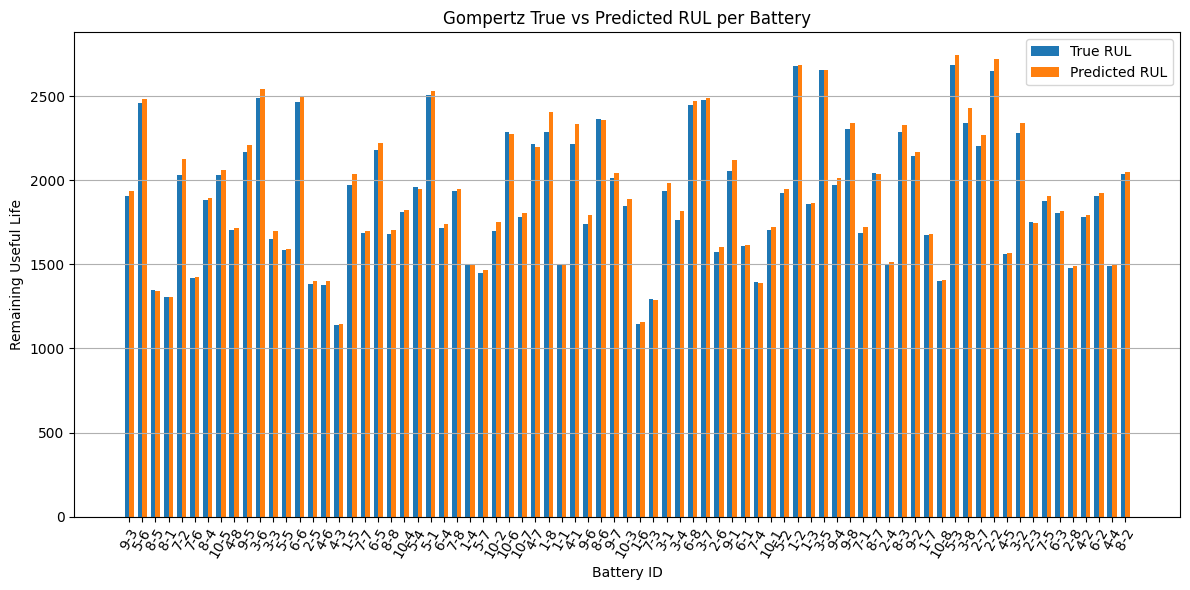

In [21]:
multi_battery_bar_plot(battery_data_dict)

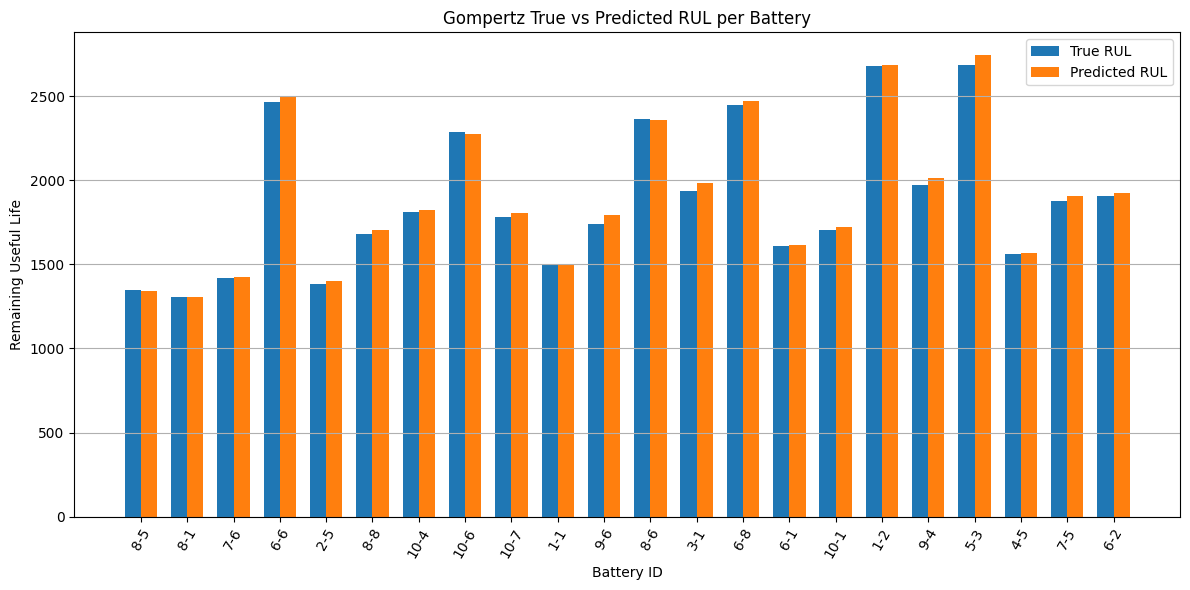

In [22]:
# test = ['7-6.csv','10-5.csv','7-7.csv','7-4.csv','4-7.csv','2-6.csv','10-2.csv','1-6.csv','8-4.csv','2-5.csv','1-1.csv','2-2.csv'] #My initial test csvs

train_ids = [
    '1-3',  '1-4',  '1-5',  '1-6',  '1-7',  '1-8',  '2-2',  '2-3',
    '2-4',  '2-6',  '2-7',  '2-8',  '3-2',  '3-3',  '3-4',  '3-5',
    '3-6',  '3-7',  '3-8',  '4-1',  '4-2',  '4-3',  '4-4',  '4-6',
    '4-7',  '4-8',  '5-1',  '5-2',  '5-4',  '5-5',  '5-6',  '5-7',
    '6-3',  '6-4',  '6-5',  '7-1',  '7-2',  '7-3',  '7-4',  '7-7',
    '7-8',  '8-2',  '8-3',  '8-4',  '8-7',  '9-1',  '9-2',  '9-3',
    '9-5',  '9-7',  '9-8',  '10-2', '10-3', '10-5', '10-8']

test_ids = [
    '1-1',  '1-2',  '2-5',  '3-1',  '4-5',  '5-3',  '6-1',  '6-2',
    '6-6',  '6-8',  '7-5',  '7-6',  '8-1',  '8-5',  '8-6',  '8-8',
    '9-4',  '9-6',  '10-1', '10-4', '10-6', '10-7']

test = [i+'.csv' for i in test_ids] #similar to BatteryML HUST test cells 

battery_data_dict = {}
for i, row in df_hust_gompertz.iterrows():
    if row['file'] in test:
        battery_data_dict[row['file'].split('.')[0]] = (None,row['rul'],row['gompertz_predicted_rul'])

multi_battery_bar_plot(battery_data_dict)

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import torch
import torch.nn as nn

def multi_battery_bar_plot(battery_data_dict):
    battery_ids = list(battery_data_dict.keys())
    true_ruls = [vals[1] for vals in battery_data_dict.values()]  # y_true
    pred_ruls = [vals[2] for vals in battery_data_dict.values()]  # y_pred

    # Compute losses
    mse = mean_squared_error(true_ruls, pred_ruls)
    mae = mean_absolute_error(true_ruls, pred_ruls)
    
    # For Huber Loss, need tensors
    y_true_tensor = torch.tensor(true_ruls, dtype=torch.float32)
    y_pred_tensor = torch.tensor(pred_ruls, dtype=torch.float32)
    huber_loss_fn = nn.SmoothL1Loss()
    huber = huber_loss_fn(y_pred_tensor, y_true_tensor).item()

    # Print losses
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Huber Loss: {huber:.4f}")
    print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse):.4f}")

    # Plot
    x = np.arange(len(battery_ids))  # label locations
    width = 0.35  # width of bars

    plt.figure(figsize=(12, 6))
    plt.bar(x - width/2, true_ruls, width, label='True RUL')
    plt.bar(x + width/2, pred_ruls, width, label='Predicted RUL')

    plt.xlabel('Battery ID')
    plt.ylabel('Remaining Useful Life')
    plt.title('Gompertz True vs Predicted RUL per Battery')
    plt.xticks(x, battery_ids, rotation=60)
    plt.legend()
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()
    return mse,mae,huber,np.sqrt(mse)

Mean Squared Error (MSE): 642.0174
Mean Absolute Error (MAE): 19.7571
Huber Loss: 19.2573
Root Mean Squared Error (RMSE): 25.3381


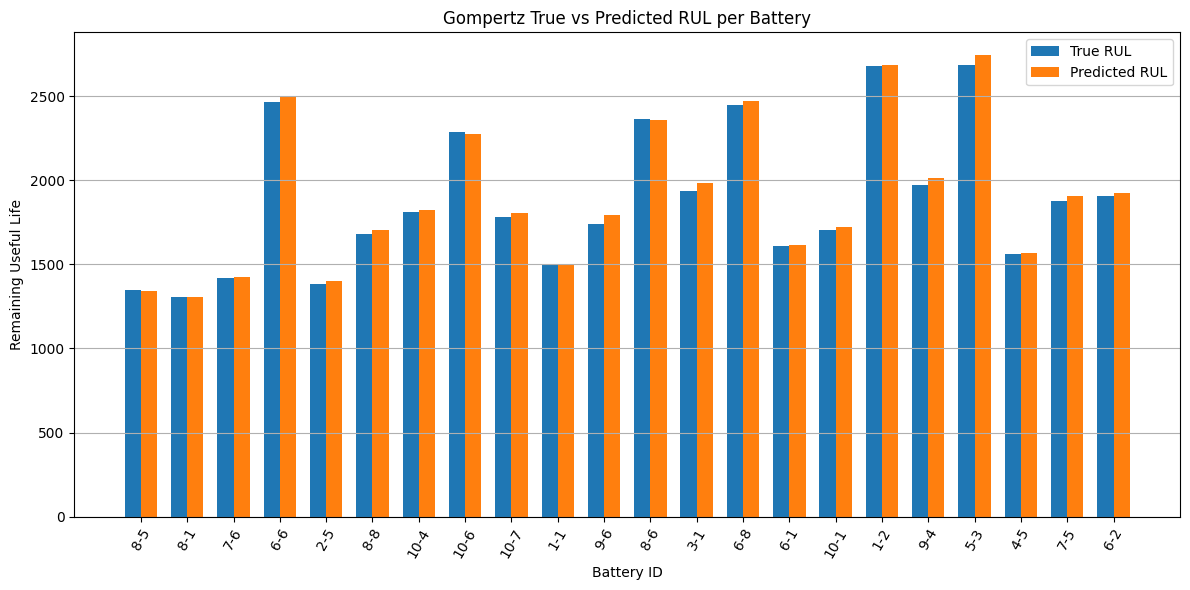

(642.0174473035661,
 19.757133975196936,
 19.257349014282227,
 np.float64(25.338063211373637))

In [24]:
multi_battery_bar_plot(battery_data_dict)

## 1. b per cycle error calculation

In [25]:
import re
import os

files = os.listdir(base_path+"csv-summary/")
#Filter out non-csv files, folders or csv that don't start with a digit

filtered = [f for f in files if re.match(r'^\d', f) and f.endswith('.csv')]

print(len(filtered))

pairs = [re.match(r'^(\d+-\d+)', f).group(1) for f in filtered]

print(pairs)

77
['6-6', '7-8', '5-3', '6-8', '5-5', '2-4', '10-3', '1-4', '6-3', '5-6', '8-3', '3-6', '10-4', '9-6', '3-2', '9-2', '9-7', '6-5', '4-8', '5-7', '1-5', '1-7', '1-8', '8-7', '6-2', '3-3', '6-1', '2-7', '1-2', '10-7', '10-1', '9-1', '8-5', '9-4', '4-4', '3-4', '10-6', '5-2', '7-5', '4-3', '5-4', '3-5', '7-2', '3-7', '1-3', '9-5', '3-1', '4-1', '9-3', '7-1', '8-8', '6-4', '4-2', '5-1', '2-3', '4-5', '4-6', '2-8', '8-1', '10-8', '9-8', '3-8', '7-3', '8-2', '8-6', '7-6', '10-5', '7-7', '7-4', '4-7', '2-6', '10-2', '1-6', '8-4', '2-5', '1-1', '2-2']


In [26]:
cycle_lengths = []
cycle_lengths_sort = {}
#Correlation of k, a and b with cycle number
##Place k, a and b of all cells in all cycles in one dataframe
for choice in pairs:
    gompertz_df_full = pd.read_csv(base_path + 'gompertz-parameters-per-cycle/' + choice + "-hust_gompertz_params.csv")
    cycle_lengths.append(gompertz_df_full.shape[0])
    cycle_lengths_sort[choice] = gompertz_df_full.shape[0]
print(f"Max : {max(cycle_lengths)}, Min : {min(cycle_lengths)}")


#sort pairs by RUL
pairs = sorted(cycle_lengths_sort, key=cycle_lengths_sort.get)
print(pairs)

Max : 2689, Min : 1142
['4-3', '1-6', '7-3', '8-1', '8-5', '4-6', '2-5', '7-4', '10-8', '7-6', '5-7', '2-8', '4-4', '2-4', '1-4', '1-1', '4-5', '2-6', '5-5', '6-1', '3-3', '1-7', '8-8', '7-7', '7-1', '10-2', '10-1', '4-8', '6-4', '9-6', '2-3', '3-4', '4-2', '10-7', '6-3', '10-4', '10-3', '1-3', '7-5', '8-4', '9-3', '6-2', '5-2', '7-8', '3-1', '5-4', '1-5', '9-4', '9-7', '7-2', '10-5', '8-2', '8-7', '9-1', '9-2', '9-5', '6-5', '2-7', '4-7', '4-1', '3-2', '1-8', '10-6', '8-3', '9-8', '3-8', '8-6', '6-8', '5-6', '6-6', '3-7', '3-6', '5-1', '2-2', '3-5', '1-2', '5-3']


In [27]:
# Consolidate k,a,b data per cycle
unified_gompertz = {}
for choice in pairs:
    #get file
    gompertz_df_full = pd.read_csv(base_path + 'gompertz-parameters-per-cycle/' + choice + "-hust_gompertz_params.csv")
    #add cell name
    gompertz_df_full['cell_name'] = choice
    for i in range(1,max(cycle_lengths)+1,1):
        try:
            temp_data = gompertz_df_full[gompertz_df_full["Cycle number"]==i].iloc[0].to_dict()
        except:
            temp_data = {'Cycle number': i, 'k': None, 'a': None,'b': None, 'rul': None, 'max_SoC_above_80': None,'SoH': None, 'cell_name': choice}
        try:
            unified_gompertz[i].append(temp_data)
        except:
            unified_gompertz[i] = []
            unified_gompertz[i].append(temp_data)

In [28]:
unified_gompertz.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 22

In [29]:
import pickle
#help(pickle)
#save consolidated gompertz per cycle as a pickle file

with open('unified_gompertz.pkl', 'wb') as file:
    pickle.dump(unified_gompertz, file)

In [30]:
unified_gompertz[1143]

[{'Cycle number': 1143,
  'k': None,
  'a': None,
  'b': None,
  'rul': None,
  'max_SoC_above_80': None,
  'SoH': None,
  'cell_name': '4-3'},
 {'Cycle number': 1143,
  'k': 0.9929696137655925,
  'a': -3.072267283798728,
  'b': -17.486426103703007,
  'rul': 1,
  'max_SoC_above_80': 30.53435391414142,
  'SoH': 0.7081841040843205,
  'gompertz-value': 0.947951156229196,
  'gompertz-1st-derivative-value': -0.7690909750111379,
  'gompertz-2nd-derivative-value': -12.824674225929034,
  'cell_name': '1-6'},
 {'Cycle number': 1143,
  'k': 0.9362102363776462,
  'a': -4.525393704158417,
  'b': -25.6844060389694,
  'rul': 153,
  'max_SoC_above_80': 27.18392499999986,
  'SoH': 0.7621633618796625,
  'gompertz-value': 0.9213095614052508,
  'gompertz-1st-derivative-value': -0.3796530621315583,
  'gompertz-2nd-derivative-value': -9.594716042852484,
  'cell_name': '7-3'},
 {'Cycle number': 1143,
  'k': 0.942463449037932,
  'a': -4.5095723268670245,
  'b': -25.534643242914665,
  'rul': 166,
  'max_SoC_a

In [31]:
#Compute Gompertz RUL prediction per cycle
gompertz_results = {}
for i in unified_gompertz.keys():
    ruls, pred_ruls = [],[]
    for k, j in enumerate(unified_gompertz[i]):
        k,a,b,rul = j['k'],j['a'],j['b'],unified_gompertz[1][k]['rul']
        if k == None: #skip over cells that have reached rul
            continue
        else:
            pred_rul = inverse_gompertz_func(0.7,k,a,b)*10000
            #print(i,j['k'],j['a'],j['b'],j['rul'],pred_rul)
            ruls.append(rul)
            pred_ruls.append(pred_rul)
    gompertz_results[i] = {'ruls':ruls,'pred_ruls':pred_ruls}
    #break

    # 2. Calculate the mean of the actual RUL
    mean_rul = np.mean(ruls)
    
    # 3. Calculate RMSE as a percentage (NRMSE)
    nrmse_percent = (rmse / mean_rul) * 100

In [32]:
gompertz_results[2500]

{'ruls': [2507, 2651, 2657, 2678, 2689],
 'pred_ruls': [np.float64(2530.062596026052),
  np.float64(2739.5393341728395),
  np.float64(2623.2964216363785),
  np.float64(2665.468055288309),
  np.float64(2750.5101973706483)]}

In [33]:
cycle_rmse = {}
cycle_nrmse = {}
for i in gompertz_results.keys():
    cycle_rmse[i] = root_mean_squared_error(gompertz_results[i]['ruls'],gompertz_results[i]['pred_ruls'])
    cycle_nrmse[i] = (cycle_rmse[i]/np.mean(gompertz_results[i]['ruls']))*100
print(cycle_rmse)

{1: 6672.627634435939, 2: 6565.314322016153, 3: 6516.098520082627, 4: 6489.555438000256, 5: 6470.417689809465, 6: 6455.8485762456285, 7: 6443.974219055584, 8: 6389.707745828762, 9: 6379.193453555486, 10: 6539.343095865465, 11: 6365.2314327858885, 12: 6359.490730289697, 13: 6369.088517694163, 14: 7166.284071849445, 15: 5205.713845012421, 16: 15641.239576588217, 17: 2885.244367728777, 18: 76616.04456461979, 19: 2978.336332296233, 20: 2904.6370296076598, 21: 2079.995199623454, 22: 2112.3196644461386, 23: 2063.750816526259, 24: 2070.6554569701107, 25: 2068.18067055936, 26: 2065.762988051474, 27: 2055.9934844212744, 28: 2065.7725308433137, 29: 2064.9354311039733, 30: 2060.0507362637845, 31: 2068.206983781494, 32: 2085.0955121261536, 33: 2081.562415004851, 34: 2072.939341117094, 35: 2092.1075667108807, 36: 2096.394728259713, 37: 2122.5648514970353, 38: 2112.5213533811107, 39: 2130.505202632783, 40: 2133.8996886972063, 41: 2145.8837946239105, 42: 2162.6284586343954, 43: 2188.2495268262605, 44

In [34]:
print(cycle_nrmse)

{1: np.float64(351.6187349280515), 2: np.float64(345.9637856005556), 3: np.float64(343.37032482881585), 4: np.float64(341.9716187336744), 5: np.float64(340.9631418371832), 6: np.float64(340.19541230678027), 7: np.float64(339.5696848299914), 8: np.float64(336.71007543615247), 9: np.float64(336.15601752218856), 10: np.float64(344.59521384982475), 11: np.float64(335.4202791670751), 12: np.float64(335.1177688727958), 13: np.float64(335.6235309278894), 14: np.float64(377.63230282394665), 15: np.float64(274.3186967506306), 16: np.float64(824.2259532426964), 17: np.float64(152.03995039427042), 18: np.float64(4037.3355357001165), 19: np.float64(156.94549594640776), 20: np.float64(153.06186014411918), 21: np.float64(109.60678773285746), 22: np.float64(111.31014779591895), 23: np.float64(108.7507787140348), 24: np.float64(109.11462352465647), 25: np.float64(108.98421294060492), 26: np.float64(108.85681148626732), 27: np.float64(108.34200072572106), 28: np.float64(108.85731435029302), 29: np.floa

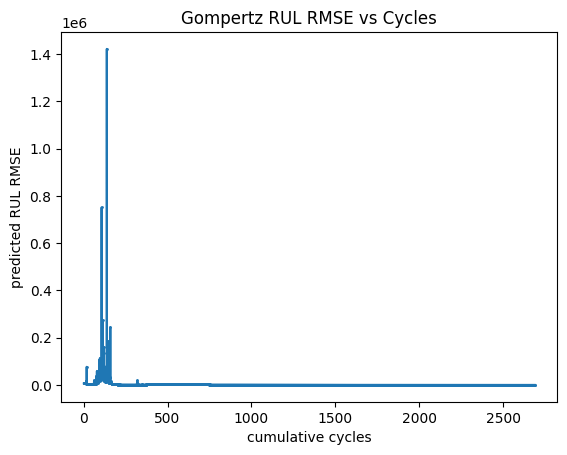

In [35]:
#Plot rmse per cycle
data = cycle_rmse

# Extract x and y values
x = list(data.keys())
y = list(data.values())

# Plot
plt.plot(x, y, marker='o',markersize=1)
plt.xlabel('cumulative cycles')
plt.ylabel('predicted RUL RMSE')
plt.title('Gompertz RUL RMSE vs Cycles')
plt.grid(False)
plt.show()

In [36]:
# help(plt.yscale)

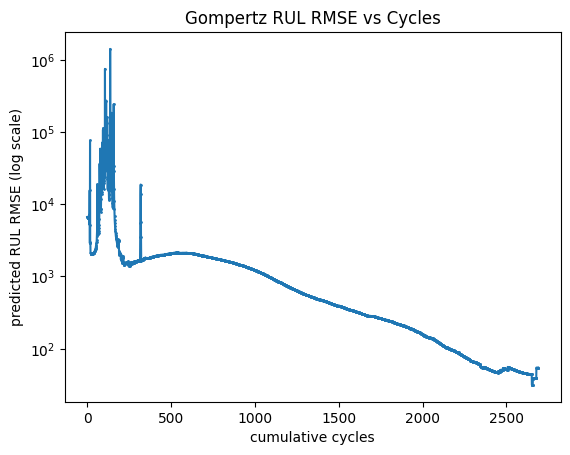

In [37]:
#Plot rmse per cycle use log scale
data = cycle_rmse

# Extract x and y values
x = list(data.keys())
y = list(data.values())

# Plot
plt.plot(x, y, marker='o',markersize=1)
plt.xlabel('cumulative cycles')
plt.ylabel('predicted RUL RMSE (log scale)')
plt.title('Gompertz RUL RMSE vs Cycles')
plt.yscale('symlog')
plt.grid(False)
plt.show()

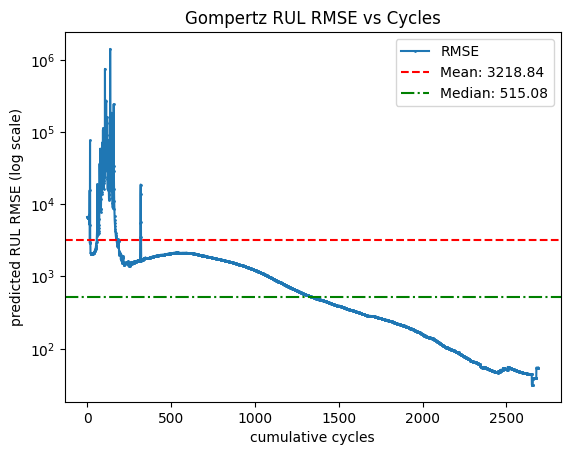

In [38]:
#Plot rmse per cycle use log scale, add mean and median values
data = cycle_rmse

# Extract x and y values
x = list(data.keys())
y = list(data.values())

# Calculate Mean and Median
mean_val = np.mean(y)
median_val = np.median(y)

# Plot
plt.plot(x, y, marker='o', markersize=1, label='RMSE')
plt.xlabel('cumulative cycles')
plt.ylabel('predicted RUL RMSE (log scale)')
plt.title('Gompertz RUL RMSE vs Cycles')
plt.yscale('symlog')
plt.grid(False)

# Add lines for mean and median
plt.axhline(y=mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axhline(y=median_val, color='g', linestyle='-.', label=f'Median: {median_val:.2f}')

# Add legend to display the labels for the lines
plt.legend()

plt.show()

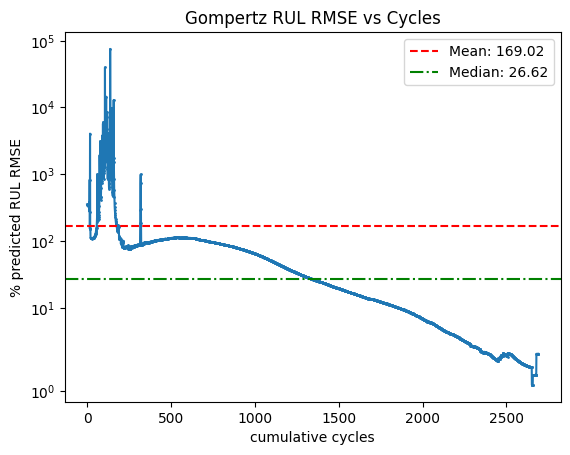

In [39]:
#Plot rmse per cycle
data = cycle_nrmse

# Extract x and y values
x = list(data.keys())
y = list(data.values())

# Plot
plt.plot(x, y, marker='o',markersize=1)
plt.xlabel('cumulative cycles')
plt.ylabel('% predicted RUL RMSE')
plt.title('Gompertz RUL RMSE vs Cycles')
plt.yscale('symlog')
plt.grid(False)
# Calculate Mean and Median
mean_val = np.mean(y)
median_val = np.median(y)
# Add lines for mean and median
plt.axhline(y=mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axhline(y=median_val, color='g', linestyle='-.', label=f'Median: {median_val:.2f}')
plt.legend()
plt.show()

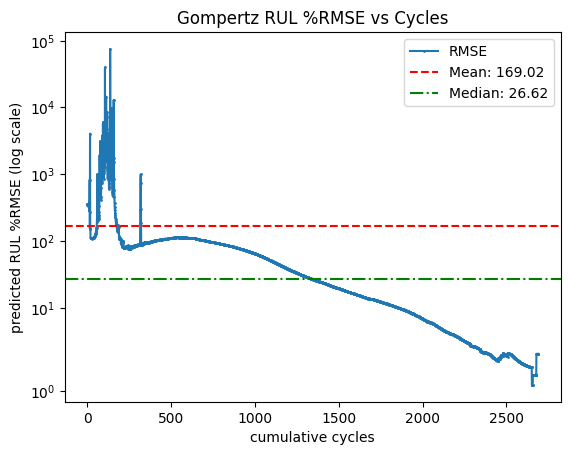

In [40]:
#Plot rmse per cycle use log scale, add mean and median values
data = cycle_nrmse

# Extract x and y values
x = list(data.keys())
y = list(data.values())

# Calculate Mean and Median
mean_val = np.mean(y)
median_val = np.median(y)

# Plot
plt.plot(x, y, marker='o', markersize=1, label='RMSE')
plt.xlabel('cumulative cycles')
plt.ylabel('predicted RUL %RMSE (log scale)')
plt.title('Gompertz RUL %RMSE vs Cycles')
plt.yscale('symlog')
plt.grid(False)

# Add lines for mean and median
plt.axhline(y=mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axhline(y=median_val, color='g', linestyle='-.', label=f'Median: {median_val:.2f}')

# Add legend to display the labels for the lines
plt.legend()

plt.show()

In [41]:
#save gompertz results
with open('gompertz_results.pkl', 'wb') as file:
    pickle.dump(gompertz_results, file)

#save gompertz rmse results
with open('gompertz_rmse_results.pkl', 'wb') as file:
    pickle.dump([cycle_rmse,cycle_nrmse], file)

In [42]:
np.median(y),np.mean(y)

(np.float64(26.62314090303185), np.float64(169.02374524235506))

# 2. NNs

In [43]:
version = '7'

### prepare data

In [44]:
WINDOW_SIZES = [100] #[5, 10, 15, 20, 25, 30, 35, 40, 50, 60, 70, 80, 90, 100,500,1000] #[i for i in range (5,100,5)]
print("WINDOW SIZES TO TEST : ",WINDOW_SIZES,len(WINDOW_SIZES))


# Make list of CSV paths
main_files_path = '/kaggle/input/hust-preprocessed-data/gompertz-parameters-per-cycle/'
#/kaggle/input/generate-hust-data-gompertz-k-a-b/1-2-hust_gompertz_params.csv
csv_files = os.listdir(main_files_path)
csv_files = [f for f in csv_files if re.match(r'^\d', f) and f.endswith('-hust_gompertz_params.csv')]

#BatteryML like train-val-test split
csv_files = [f.removesuffix('-hust_gompertz_params.csv') for f in csv_files]
print(csv_files)

train_ids = [
    '1-3',  '1-4',  '1-5',  '1-6',  '1-7',  '1-8',  '2-2',  '2-3',
    '2-4',  '2-6',  '2-7',  '2-8',  '3-2',  '3-3',  '3-4',  '3-5',
    '3-6',  '3-7',  '3-8',  '4-1',  '4-2',  '4-3',  '4-4',  '4-6',
    '4-7',  '4-8',  '5-1',  '5-2',  '5-4',  '5-5',  '5-6',  '5-7',
    '6-3',  '6-4',  '6-5',  '7-1',  '7-2',  '7-3',  '7-4',  '7-7',
    '7-8',  '8-2',  '8-3',  '8-4',  '8-7',  '9-1',  '9-2',  '9-3',
    '9-5',  '9-7',  '9-8',  '10-2', '10-3', '10-5', '10-8']

test_ids = [f for f in csv_files if f not in train_ids]

print(test_ids,len(test_ids))

#csv_paths = [os.path.join(main_files_path, file) for file in csv_files]
#separate according to train, val and test
train_paths = [os.path.join(main_files_path, file+'-hust_gompertz_params.csv') for file in train_ids]

testing_paths = [os.path.join(main_files_path, file+'-hust_gompertz_params.csv') for file in test_ids]

val_paths = testing_paths[:int(len(testing_paths)*0.5)]
test_paths = testing_paths[int(len(testing_paths)*0.5):]

print(len(train_paths), len(val_paths), len(test_paths))

WINDOW SIZES TO TEST :  [100] 1
['6-6', '8-7', '8-6', '9-1', '10-1', '6-8', '8-8', '10-7', '3-5', '5-1', '5-5', '7-1', '2-7', '10-6', '4-7', '7-7', '7-6', '4-5', '9-2', '10-4', '3-1', '9-7', '8-1', '10-8', '8-4', '4-6', '4-4', '3-8', '5-4', '9-6', '10-5', '7-8', '5-2', '9-8', '1-2', '5-6', '10-2', '2-6', '6-1', '2-4', '1-4', '4-1', '1-6', '6-2', '8-5', '5-7', '1-5', '1-8', '5-3', '6-5', '9-5', '4-8', '7-2', '2-5', '7-3', '9-3', '9-4', '8-2', '10-3', '6-3', '3-2', '7-5', '3-7', '2-3', '1-3', '8-3', '2-8', '7-4', '4-2', '6-4', '1-1', '3-3', '4-3', '3-4', '2-2', '1-7', '3-6']
['6-6', '8-6', '10-1', '6-8', '8-8', '10-7', '10-6', '7-6', '4-5', '10-4', '3-1', '8-1', '9-6', '1-2', '6-1', '6-2', '8-5', '5-3', '2-5', '9-4', '7-5', '1-1'] 22
55 11 11


## 2a. NNs that predict RUL from SoH

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error , root_mean_squared_error
from torch import nn
from torch.utils.data import DataLoader, TensorDataset

def df_to_X_y_tensor(df, window_size=5,output_size=5,I=0):
    '''
    Converts a time series into (X, y) tensors for LSTM training.
    
    X shape: (num_samples, window_size, 1)
    y shape: (num_samples, 1)
    '''
    X, y = [], []
    
    # X.append(list(df['SoH'])[I:window_size+I])
    
    # y.append(list(df['rul'])[:1])
    X.append(list(df['SoH'])[I:window_size+I])
    y.append(list(df['rul'])[window_size+I:1+I+window_size])
    X,y = np.array(X),np.array(y)
    X_tensor = torch.tensor(X, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.float32)
    return X_tensor, y_tensor

def get_x_y_lists(paths):
    X_list,y_list = [],[]
    for path in paths:
        #print(path)
        df = pd.read_csv(path)
        df['Cycle number'] = df['Cycle number']/10000
        df['rul'] = df['rul']/10000
        #normalize SoH
        df['SoH'] =  df['SoH']/soh_normalization_constant
        df.index = df['Cycle number']
        #SoH = df[model_columns]
        X, y = df_to_X_y_tensor(df, window_size=WINDOW_SIZE,output_size=OUTPUT_SIZE,I=I)
        X_list.append(X)
        y_list.append(y)
    return X_list,y_list

def give_paths_get_loaders(paths,data_type,shuffle=False):
        X_list, y_list = get_x_y_lists(paths)
    
        if INPUT_SIZE == 1:
            # Concatenate all X and y
            X_1,y_1 = torch.cat(X_list, dim=0).unsqueeze(-1),torch.cat(y_list, dim=0).view(-1,INPUT_SIZE)
        else:
            X_1,y_1 = torch.cat(X_list, dim=0).squeeze(2),torch.cat(y_list, dim=0).view(-1,INPUT_SIZE)
        
        #print(f"X_{data_type} , y_{data_type} shapes : ",X_1.shape, y_1.shape)
        
        #DataLoader
        #print("load : ")
        loader = DataLoader(TensorDataset(X_1, y_1), batch_size=32, shuffle=shuffle)
        #print(f"{data_type}loader lengths : ",loader.__len__())
        return loader,X_1,y_1

In [46]:
INPUT_SIZE, OUTPUT_SIZE = 1,1
soh_normalization_constant = 1.0
cutoff_soh = 0.70/soh_normalization_constant #set cutoff soh wrt to normalizer
WINDOW_SIZE = 100
I = 0
test_loader,X_test,y_test = give_paths_get_loaders(test_paths,'test')

In [47]:
#initialize model
class LSTMModel(nn.Module):
    def __init__(self, input_size=5, hidden_size=64, output_size=5):
        super(LSTMModel, self).__init__()
        
        # LSTM: input_size=5 match your features
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        
        # Linear Layer: Maps hidden_size (64) -> output_size (5)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        
        # Run LSTM
        lstm_out, _ = self.lstm(x)
        
        # Take the last time step only
        last_time_step = lstm_out[:, -1, :] 
        
        prediction = self.fc(last_time_step)
        
        return prediction
        
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LSTMModel(input_size=INPUT_SIZE, output_size=OUTPUT_SIZE).to(device)
#load model
model.load_state_dict(torch.load(f"/kaggle/input/gi-lstm-models/pytorch/default/{version}/SoH-to-RUL-best_lstm_model-window-100.pth"))
#generate test_loader
test_rmse = 0
for X_test, y_test in test_loader:
    X_test = X_test.to(device)
    y_pred = model(X_test)
    print(y_pred,'\n',y_test)
    #inference for test results
    test_rmse += root_mean_squared_error(y_test, y_pred.cpu().detach().numpy())

print('\n RMSE for 100th cycle : ',test_rmse/len(test_loader)*10000) #multiply by 10,000 because cycle numbers had been normalized using 10000
print('\n Test %RMSE for 100th cycle by SoH to RUL prediction : ',(test_rmse/len(test_loader)*10000)/(np.mean(y_test.cpu().detach().numpy())*10000)*100)
# print(np.mean(y_test.cpu().detach().numpy())*10000)
# print(test_rmse/len(test_loader)*10000)

tensor([[0.1505],
        [0.1947],
        [0.1847],
        [0.1499],
        [0.1953],
        [0.1450],
        [0.1860],
        [0.1757],
        [0.1969],
        [0.1855],
        [0.1459]], device='cuda:0', grad_fn=<AddmmBackward0>) 
 tensor([[0.1208],
        [0.1642],
        [0.2578],
        [0.1509],
        [0.1808],
        [0.1248],
        [0.2589],
        [0.1286],
        [0.1875],
        [0.1775],
        [0.1404]])

 RMSE for 100th cycle :  375.21008402109146

 Test %RMSE for 100th cycle by SoH to RUL prediction :  21.812233


In [48]:
def df_to_X_y_tensor(df, window_size=5,output_size=5,I=0):
    '''
    Converts a time series into (X, y) tensors for LSTM training.
    
    X shape: (num_samples, window_size, 1)
    y shape: (num_samples, 1)
    '''
    X, y = [], []
    
    if len(df) >= window_size+I+1:
        X.append(list(df['SoH'])[I:window_size+I])
        y.append(list(df['rul'])[window_size+I:1+I+window_size])
    else:
        pass
    X,y = np.array(X),np.array(y)
    X_tensor = torch.tensor(X, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.float32)
    return X_tensor, y_tensor


In [49]:
from tqdm import tqdm
cycle_rmse = {}
cycle_nrmse = {}

#test on per cycle basis
for I in tqdm(range(WINDOW_SIZE,2678)):
    test_rmse = 0
    test_loader,X_test,y_test = give_paths_get_loaders(test_paths,'test')
    for X_test, y_test in test_loader:
        X_test = X_test.to(device)
        y_pred = model(X_test)
        #print(y_pred,'\n',y_test)
        #inference for test results
        test_rmse += root_mean_squared_error(y_test, y_pred.cpu().detach().numpy())
    
    #print(f'\n Test RMSE for cycle {I} SoH to RUL prediction : ',test_rmse/len(test_loader)*10000) #multiply by 10,000 because cycle numers had been normalized using 10000
    if len(test_loader) > 0:
        cycle_rmse[I] = test_rmse/len(test_loader)*10000
        cycle_nrmse[I] = (test_rmse/len(test_loader)*10000)/(np.mean(y_test.cpu().detach().numpy())*10000)*100
    

100%|██████████| 2578/2578 [02:44<00:00, 15.67it/s]


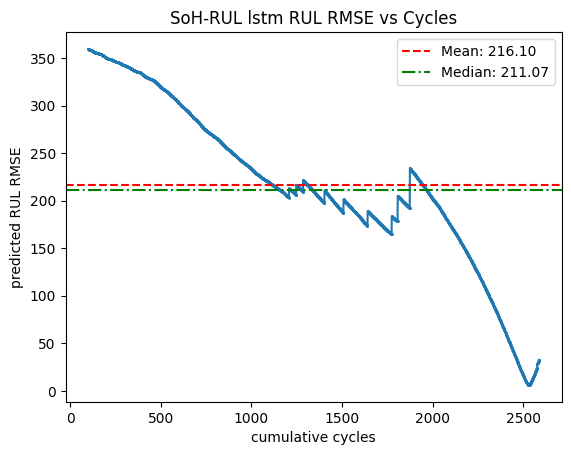

In [50]:
#Plot rmse per cycle use log scale
data = cycle_rmse

# Extract x and y values
x = list(data.keys())
y = list(data.values())

# Plot
plt.plot(x, y, marker='o',markersize=1)
plt.xlabel('cumulative cycles')
plt.ylabel('predicted RUL RMSE')
plt.title('SoH-RUL lstm RUL RMSE vs Cycles')
#plt.yscale('symlog')
plt.grid(False)
# Calculate Mean and Median
mean_val = np.mean(y)
median_val = np.median(y)
# Add lines for mean and median
plt.axhline(y=mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axhline(y=median_val, color='g', linestyle='-.', label=f'Median: {median_val:.2f}')
plt.legend()
plt.show()

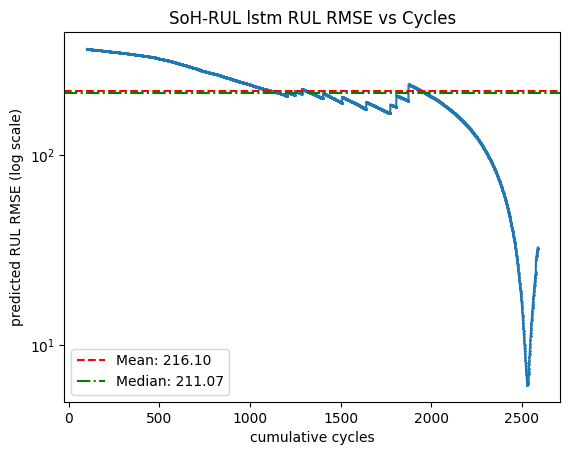

In [51]:
#Plot rmse per cycle use log scale
data = cycle_rmse

# Extract x and y values
x = list(data.keys())
y = list(data.values())

# Plot
plt.plot(x, y, marker='o',markersize=1)
plt.xlabel('cumulative cycles')
plt.ylabel('predicted RUL RMSE (log scale)')
plt.title('SoH-RUL lstm RUL RMSE vs Cycles')
plt.yscale('symlog')
plt.grid(False)

# Calculate Mean and Median
mean_val = np.mean(y)
median_val = np.median(y)
# Add lines for mean and median
plt.axhline(y=mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axhline(y=median_val, color='g', linestyle='-.', label=f'Median: {median_val:.2f}')
plt.legend()
plt.show()

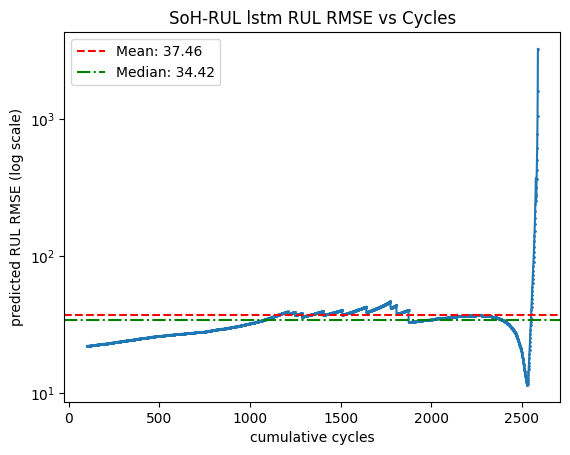

In [52]:
#Plot rmse per cycle use log scale
data = cycle_nrmse

# Extract x and y values
x = list(data.keys())
y = list(data.values())

# Plot
plt.plot(x, y, marker='o',markersize=1)
plt.xlabel('cumulative cycles')
plt.ylabel('predicted RUL RMSE (log scale)')
plt.title('SoH-RUL lstm RUL RMSE vs Cycles')
plt.yscale('symlog')
plt.grid(False)
# Calculate Mean and Median
mean_val = np.mean(y)
median_val = np.median(y)
# Add lines for mean and median
plt.axhline(y=mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axhline(y=median_val, color='g', linestyle='-.', label=f'Median: {median_val:.2f}')
plt.legend()
plt.show()

In [53]:
#save SoH to RUL rmse results
with open('SOH_to_RUL_rmse_results.pkl', 'wb') as file:
    pickle.dump([cycle_rmse,cycle_nrmse], file)

## 2b. LSTMs that predict SoH from SoH

In [54]:
def df_to_X_y_tensor(df, window_size=5,output_size=5,i=0):
    '''
    Converts a time series into (X, y) tensors for LSTM training.
    
    X shape: (num_samples, window_size, 1)
    y shape: (num_samples, 1)
    '''
    if isinstance(df, (pd.DataFrame, pd.Series)):
        df_as_np = df.to_numpy()
    else:
        df_as_np = df  # Assume already numpy

    X, y = [], []

    X.append([[val] for val in df_as_np[i:i+window_size]])
    #y.append([df_as_np[i + window_size:i + window_size+output_size]])
    y.append([[val] for val in df_as_np[i + window_size:i + window_size+1]]) #next cycle
    
    X,y = np.array(X),np.array(y)
    X_tensor = torch.tensor(X, dtype=torch.float32)#.squeeze()
    y_tensor = torch.tensor(y, dtype=torch.float32)#.squeeze()
    return X_tensor, y_tensor

def get_x_y_lists(paths):
    X_list,y_list = [],[]
    for path in paths:
        print(path)
        df = pd.read_csv(path)
        df['Cycle number'] = df['Cycle number']/10000
        df['rul'] = df['rul']
        #normalize SoH
        df['SoH'] =  df['SoH']/soh_normalization_constant
        df.index = df['Cycle number']
        SoH = df[model_columns]
        X, y = df_to_X_y_tensor(SoH, window_size=WINDOW_SIZE,output_size=OUTPUT_SIZE,i=I)
        X_list.append(X)
        y_list.append(y)
    return X_list,y_list

def give_paths_get_loaders(paths,data_type,shuffle=False):
    X_list, y_list = get_x_y_lists(paths)

    if INPUT_SIZE == 1:
        # Concatenate all X and y
        X_1,y_1 = torch.cat(X_list, dim=0).squeeze(-1),torch.cat(y_list, dim=0).view(-1,INPUT_SIZE)
    else:
        X_1,y_1 = torch.cat(X_list, dim=0).squeeze(2),torch.cat(y_list, dim=0).view(-1,INPUT_SIZE)
    
    #print(f"X_{data_type} , y_{data_type} shapes : ",X_1.shape, y_1.shape)
    
    #DataLoader
    #print("load : ")
    loader = DataLoader(TensorDataset(X_1, y_1), batch_size=32, shuffle=shuffle)
    #print(f"{data_type}loader lengths : ",loader.__len__())
    return loader,X_1,y_1

In [55]:
INPUT_SIZE, OUTPUT_SIZE = 1,1
soh_normalization_constant = 1.0
cutoff_soh = 0.70/soh_normalization_constant #set cutoff soh wrt to normalizer
WINDOW_SIZE = 100
I = 0
model_columns = ['SoH']
test_loader,X_test,y_test = give_paths_get_loaders(test_paths,'test')

/kaggle/input/hust-preprocessed-data/gompertz-parameters-per-cycle/8-1-hust_gompertz_params.csv
/kaggle/input/hust-preprocessed-data/gompertz-parameters-per-cycle/9-6-hust_gompertz_params.csv
/kaggle/input/hust-preprocessed-data/gompertz-parameters-per-cycle/1-2-hust_gompertz_params.csv
/kaggle/input/hust-preprocessed-data/gompertz-parameters-per-cycle/6-1-hust_gompertz_params.csv
/kaggle/input/hust-preprocessed-data/gompertz-parameters-per-cycle/6-2-hust_gompertz_params.csv
/kaggle/input/hust-preprocessed-data/gompertz-parameters-per-cycle/8-5-hust_gompertz_params.csv
/kaggle/input/hust-preprocessed-data/gompertz-parameters-per-cycle/5-3-hust_gompertz_params.csv
/kaggle/input/hust-preprocessed-data/gompertz-parameters-per-cycle/2-5-hust_gompertz_params.csv
/kaggle/input/hust-preprocessed-data/gompertz-parameters-per-cycle/9-4-hust_gompertz_params.csv
/kaggle/input/hust-preprocessed-data/gompertz-parameters-per-cycle/7-5-hust_gompertz_params.csv
/kaggle/input/hust-preprocessed-data/gom

In [56]:
## NNs from BatteryML but the input is a particular length of cycles eg 100 (similar to BatteryML)
#initialize model
class LSTMModel(nn.Module):
    def __init__(self, input_size=5, hidden_size=64, output_size=5):
        super(LSTMModel, self).__init__()
        
        # LSTM: input_size=5 match your features
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        
        # Linear Layer: Maps hidden_size (64) -> output_size (5)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # x shape: [32, 10, 5]
        
        # Run LSTM
        # lstm_out shape: [32, 10, 64]
        lstm_out, _ = self.lstm(x)
        
        # Take the last time step only
        last_time_step = lstm_out[:, -1, :] 
        # last_time_step shape: [32, 64]
        
        # Project to 5 output features
        prediction = self.fc(last_time_step)
        # prediction shape: [32, 5]
        
        return prediction
        
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LSTMModel(input_size=INPUT_SIZE, output_size=OUTPUT_SIZE).to(device)
#load model
model.load_state_dict(torch.load(f"/kaggle/input/gi-lstm-models/pytorch/default/{version}/SoH-to-SoH-best_lstm_model-window-100.pth"))
#generate test_loader
test_rmse = 0
for X_test, y_test in test_loader:
    X_test = X_test.to(device)
    y_pred = model(X_test)
    #print(y_pred,'\n',y_test)
    #inference for test results
    test_rmse += root_mean_squared_error(y_test, y_pred.cpu().detach().numpy())

print('\n Test RMSE for SoH to SoH prediction : ',test_rmse/len(test_loader))


 Test RMSE for SoH to SoH prediction :  0.00037266479921527207


In [57]:
# X_test[0],y_test[0],y_pred[0]

In [58]:
# for i in range(100, 3000):
#     for X_test, y_test in test_loader:
#         X_test = X_test.to(device)
#         y_pred = model(X_test)
#         X_test = torch.cat((X_test[0][1:], y_pred[0].detach().view(1, 1)), dim=0)

all_step_predictions = []
current_window = X_test.clone() # Start with the initial X from loader

# Number of steps you want to forecast into the future
forecast_steps = 3000 

for _ in range(forecast_steps):
    # 1. Get prediction for current window
    # y_pred shape: [Batch, 1] (Next Capacity)
    y_pred = model(current_window)
    
    # Store for evaluation
    all_step_predictions.append(y_pred.detach())

    # 2. UPDATE ALL BATCHES AT ONCE
    # Assuming the value you append is the 1st column of your prediction
    # or the only column if predicting capacity directly.
    next_val = y_pred[:, 0:1].unsqueeze(1) # Shape: [Batch, 1, 1]
    
    # Drop index 0, append new value to end
    current_window = torch.cat((current_window[:, 1:, :], next_val.detach()), dim=1)

# Now current_window is updated for the next iteration

In [59]:
all_step_predictions[-1]

tensor([[0.6778],
        [0.6779],
        [0.6778],
        [0.6778],
        [0.6779],
        [0.6778],
        [0.6778],
        [0.6778],
        [0.6779],
        [0.6778],
        [0.6778]], device='cuda:0')

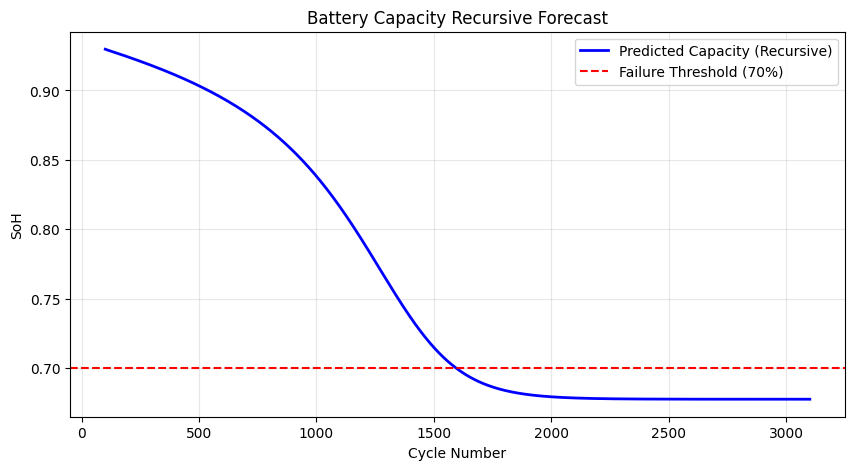

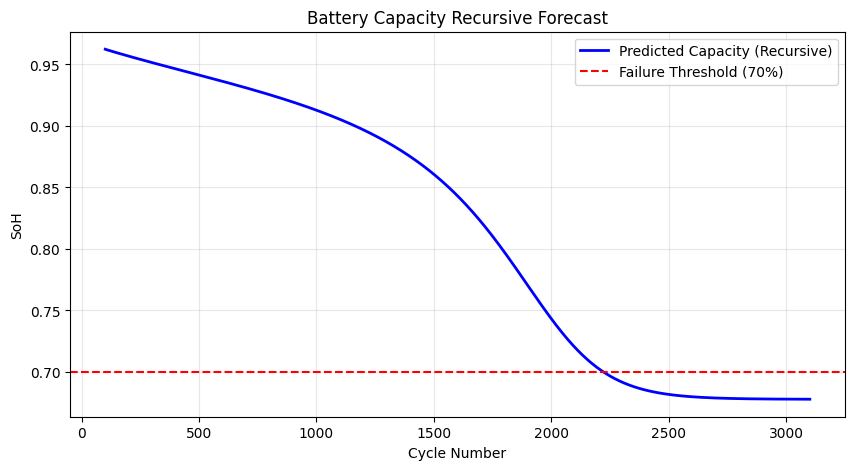

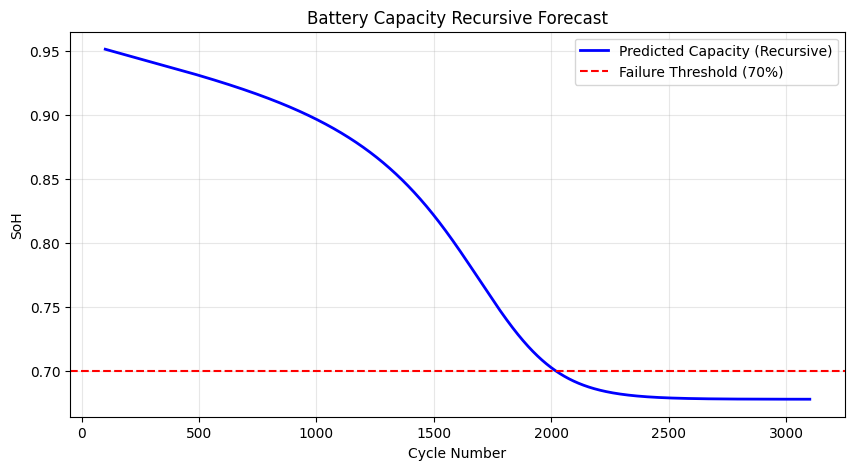

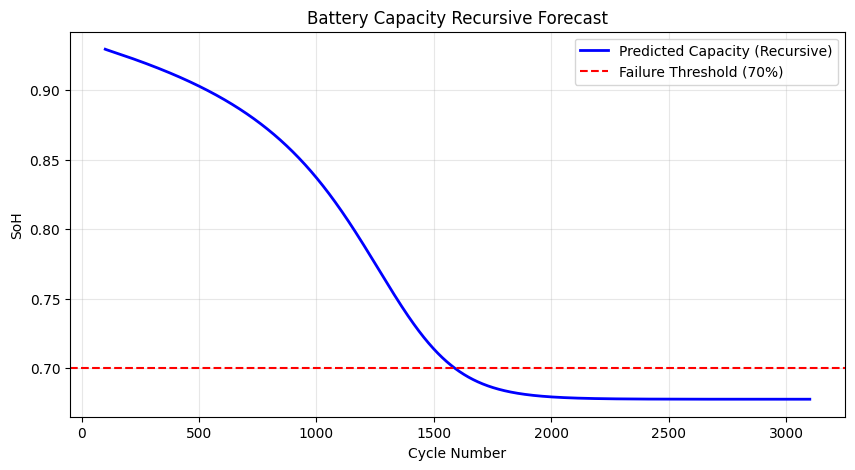

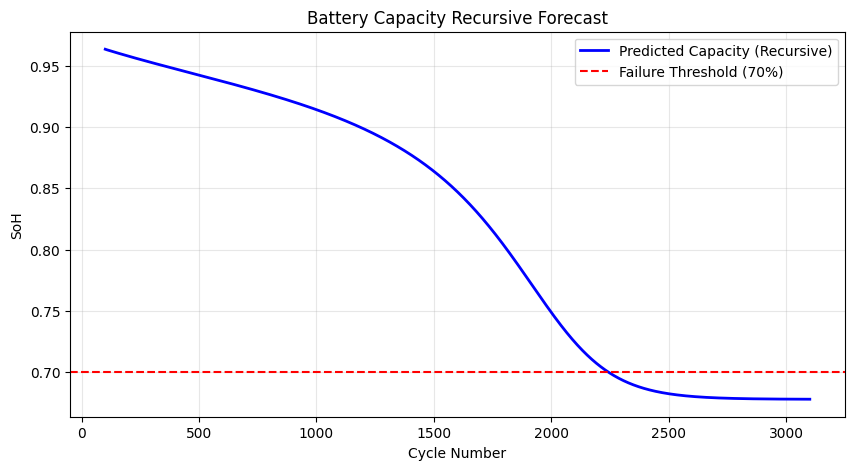

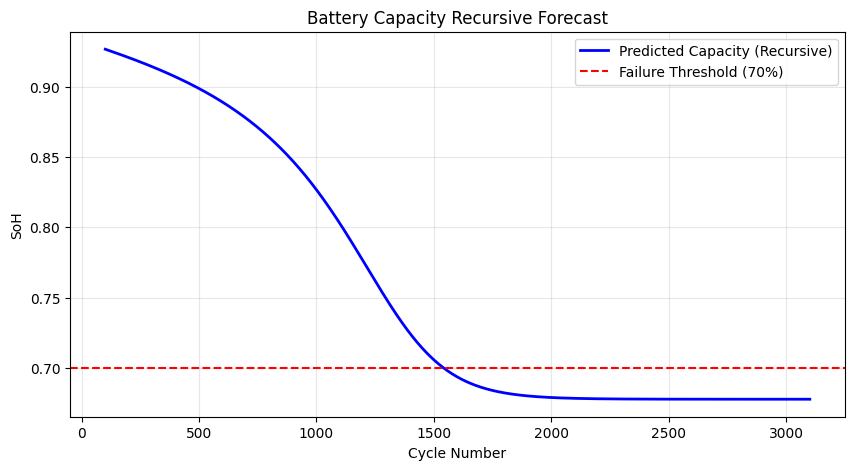

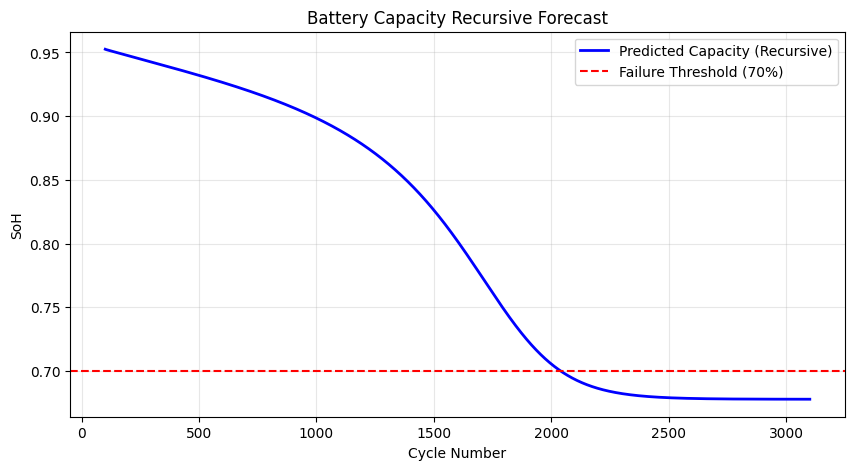

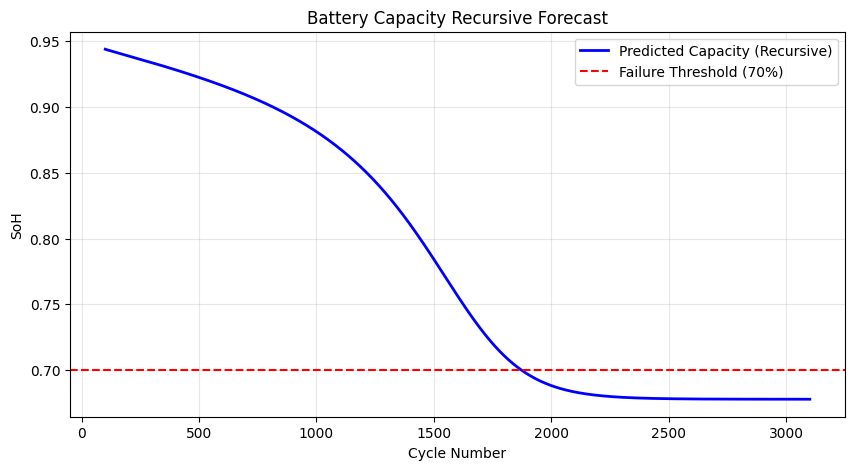

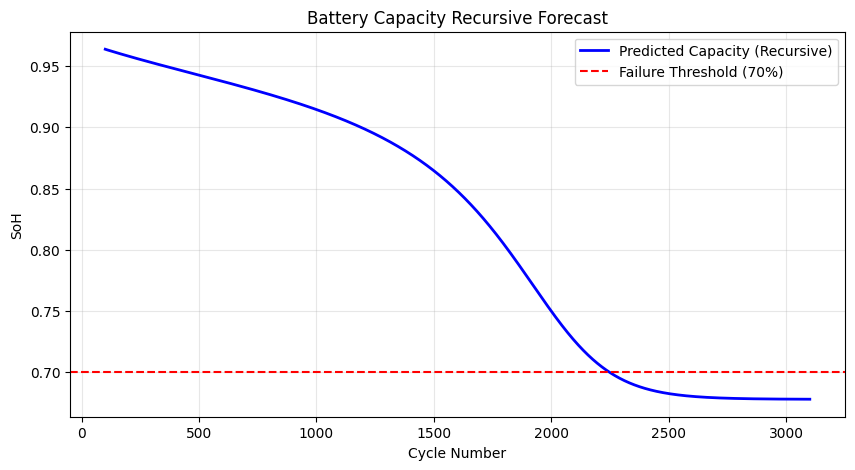

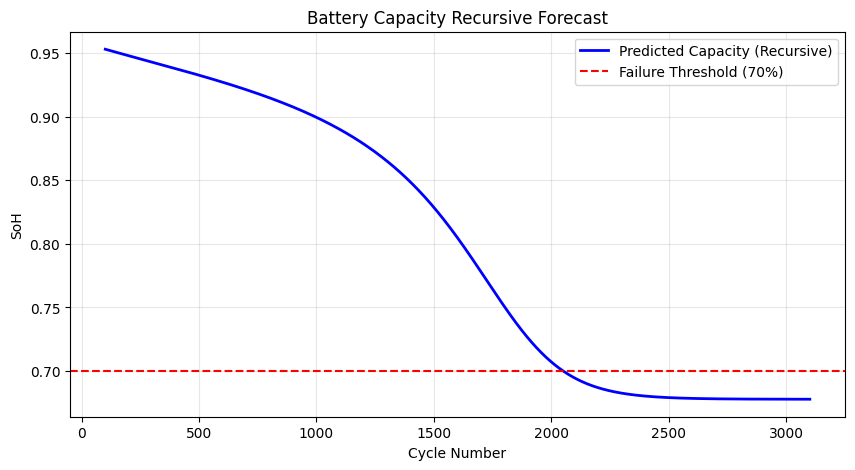

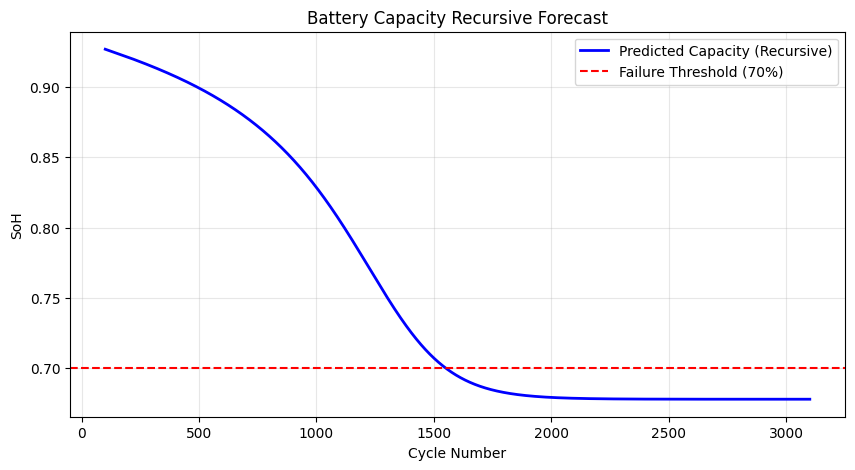

In [60]:
# 1. Stack the list into a single tensor: [Steps, Batch, 4]
all_preds_tensor = torch.stack(all_step_predictions) 
for i in range(0,11):
    # 2. Extract the 1st feature (Capacity) for the 1st battery in the batch (Index 0)
    # Shape will be [Steps]
    first_battery_forecast = all_preds_tensor[:, i, 0].cpu().numpy()
    
    # 3. Create a time/cycle axis for the forecast
    start_cycle = 101 # Assuming your window was 100
    cycles = range(start_cycle, start_cycle + len(first_battery_forecast))
    
    # 4. Plot
    plt.figure(figsize=(10, 5))
    plt.plot(cycles, first_battery_forecast, label='Predicted Capacity (Recursive)', color='blue', linewidth=2)
    plt.axhline(y=0.7, color='red', linestyle='--', label='Failure Threshold (70%)')
    
    plt.title('Battery Capacity Recursive Forecast')
    plt.xlabel('Cycle Number')
    plt.ylabel('SoH')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

In [61]:
# 1. Stack into a single tensor: [Steps, Batch, Features]
# We want to analyze feature 0 (Capacity)
all_preds_tensor = torch.stack(all_step_predictions) 
capacity_forecasts = all_preds_tensor[:, :, 0] # Shape: [Steps, Batch]

# 2. Create a boolean mask where Capacity <= 0.7
# Shape: [Steps, Batch]
is_failed = capacity_forecasts <= 0.7

# 3. Find the first occurrence of True along the 'Steps' dimension (dim 0)
# torch.argmax returns the index of the first 'True' it finds.
# If a cell never hits 0.7, it returns 0 (we will handle this below).
steps_to_failure = torch.argmax(is_failed.to(torch.int), dim=0)

# 4. Handle cells that never reached the threshold
# argmax returns 0 if no True is found. We check if the value at that 
# index is actually <= 0.7 to verify it really failed.
never_failed = ~is_failed.any(dim=0)
steps_to_failure[never_failed] = len(all_step_predictions) # Assign max steps if no failure

# 5. Convert to list or print results
failure_steps_list = steps_to_failure.tolist()

for i, steps in enumerate(failure_steps_list):
    status = "REACHED EoL" if not never_failed[i] else "STILL HEALTHY"
    print(f"Cell {i}: {steps+WINDOW_SIZE+I} steps to reach 0.7 ({status})")

Cell 0: 1596 steps to reach 0.7 (REACHED EoL)
Cell 1: 2221 steps to reach 0.7 (REACHED EoL)
Cell 2: 2018 steps to reach 0.7 (REACHED EoL)
Cell 3: 1589 steps to reach 0.7 (REACHED EoL)
Cell 4: 2242 steps to reach 0.7 (REACHED EoL)
Cell 5: 1541 steps to reach 0.7 (REACHED EoL)
Cell 6: 2039 steps to reach 0.7 (REACHED EoL)
Cell 7: 1872 steps to reach 0.7 (REACHED EoL)
Cell 8: 2246 steps to reach 0.7 (REACHED EoL)
Cell 9: 2050 steps to reach 0.7 (REACHED EoL)
Cell 10: 1549 steps to reach 0.7 (REACHED EoL)


In [62]:
'''
        [[0.1208],
        [0.1642],
        [0.2578],
        [0.1509],
        [0.1808],
        [0.1248],
        [0.2589],
        [0.1286],
        [0.1875],
        [0.1775],
        [0.1404]]
'''
print()

# RMSE per cycle

In [63]:
# def df_to_X_y_tensor(df, window_size=5,output_size=5,I=0):
#     '''
#     Converts a time series into (X, y) tensors for LSTM training.
    
#     X shape: (num_samples, window_size, 1)
#     y shape: (num_samples, 1)
#     '''
#     X, y = [], []
    
#     # X.append(list(df['SoH'])[I:window_size+I])
    
#     # y.append(list(df['rul'])[:1])
#     X.append(list(df['SoH'])[I:window_size+I])
#     y.append(list(df['rul'])[:1])
#     X,y = np.array(X),np.array(y)
#     X_tensor = torch.tensor(X, dtype=torch.float32)
#     y_tensor = torch.tensor(y, dtype=torch.float32)
#     return X_tensor, y_tensor
    
def df_to_X_y_tensor(df, window_size=5,output_size=5,I=0):
    '''
    Converts a time series into (X, y) tensors for LSTM training.
    
    X shape: (num_samples, window_size, 1)
    y shape: (num_samples, 1)
    '''
    X, y = [], []
    
    if len(df) > window_size+I+1:
        X.append(list(df['SoH'])[I:window_size+I])
        y.append(list(df['rul'])[:1])
        # X.append(list(df['SoH'])[I:window_size+I])
        # y.append(list(df['rul'])[window_size+I:1+I+window_size])
    else:
        pass
    X,y = np.array(X),np.array(y)
    X_tensor = torch.tensor(X, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.float32)
    return X_tensor, y_tensor
    
def get_x_y_lists(paths):
    X_list,y_list = [],[]
    for path in paths:
        #print(path)
        df = pd.read_csv(path)
        df['Cycle number'] = df['Cycle number']/10000
        df['rul'] = df['rul']/10000
        #normalize SoH
        df['SoH'] =  df['SoH']/soh_normalization_constant
        df.index = df['Cycle number']
        #SoH = df[model_columns]
        X, y = df_to_X_y_tensor(df, window_size=WINDOW_SIZE,output_size=OUTPUT_SIZE,I=I)
        X_list.append(X)
        y_list.append(y)
    return X_list,y_list

def give_paths_get_loaders(paths,data_type,shuffle=False):
        X_list, y_list = get_x_y_lists(paths)
    
        if INPUT_SIZE == 1:
            # Concatenate all X and y
            X_1,y_1 = torch.cat(X_list, dim=0).unsqueeze(-1),torch.cat(y_list, dim=0).view(-1,INPUT_SIZE)
        else:
            X_1,y_1 = torch.cat(X_list, dim=0).squeeze(2),torch.cat(y_list, dim=0).view(-1,INPUT_SIZE)
        
        #print(f"X_{data_type} , y_{data_type} shapes : ",X_1.shape, y_1.shape)
        
        #DataLoader
        #print("load : ")
        loader = DataLoader(TensorDataset(X_1, y_1), batch_size=32, shuffle=shuffle)
        #print(f"{data_type}loader lengths : ",loader.__len__())
        return loader,X_1,y_1

In [64]:
def forecast_RUL(loader,X_test,y_test,model):
    ## A function to handle the model's recursive nature and compute RUL
    all_step_predictions = []
    current_window = X_test.clone() # Start with the initial X from loader
    
    # Number of steps you want to forecast into the future
    forecast_steps = 3000 
    
    for _ in range(forecast_steps):
        # 1. Get prediction for current window
        # y_pred shape: [Batch, 1] (Next Capacity)
        y_pred = model(current_window)
        
        # Store for evaluation
        all_step_predictions.append(y_pred.detach())
    
        # 2. UPDATE ALL BATCHES AT ONCE
        # Assuming the value you append is the 1st column of your prediction
        # or the only column if predicting capacity directly.
        next_val = y_pred[:, 0:1].unsqueeze(1) # Shape: [Batch, 1, 1]
        
        # Drop index 0, append new value to end
        current_window = torch.cat((current_window[:, 1:, :], next_val.detach()), dim=1)
    
    # Now current_window is updated for the next iteration
    
    # 1. Stack into a single tensor: [Steps, Batch, Features]
    # We want to analyze feature 0 (Capacity)
    all_preds_tensor = torch.stack(all_step_predictions) 
    capacity_forecasts = all_preds_tensor[:, :, 0] # Shape: [Steps, Batch]
    
    # 2. Create a boolean mask where Capacity <= 0.7
    # Shape: [Steps, Batch]
    is_failed = capacity_forecasts <= 0.7
    
    # 3. Find the first occurrence of True along the 'Steps' dimension (dim 0)
    # torch.argmax returns the index of the first 'True' it finds.
    # If a cell never hits 0.7, it returns 0 (we will handle this below).
    steps_to_failure = torch.argmax(is_failed.to(torch.int), dim=0)
    
    # 4. Handle cells that never reached the threshold
    # argmax returns 0 if no True is found. We check if the value at that 
    # index is actually <= 0.7 to verify it really failed.
    never_failed = ~is_failed.any(dim=0)
    steps_to_failure[never_failed] = len(all_step_predictions) # Assign max steps if no failure
    
    # 5. Convert to list or print results
    failure_steps_list = steps_to_failure.tolist()
    RUL_steps = []
    for i, steps in enumerate(failure_steps_list):
        status = "REACHED EoL" if not never_failed[i] else "STILL HEALTHY"
        #print(f"Cell {i}: {steps+WINDOW_SIZE+I} steps to reach 0.7 ({status})")
        RUL_steps.append(steps+WINDOW_SIZE+I)
    return RUL_steps

In [65]:
INPUT_SIZE, OUTPUT_SIZE = 1,1
soh_normalization_constant = 1.0
cutoff_soh = 0.70/soh_normalization_constant #set cutoff soh wrt to normalizer
WINDOW_SIZE = 100
I = 0
model_columns = ['SoH']
test_loader,X_test,y_test = give_paths_get_loaders(test_paths,'test')
for X_test, y_test in test_loader:
    X_test = X_test.to(device)
    break
    # y_pred = model(X_test)
    # #print(y_pred,'\n',y_test)
    # #inference for test results
    # test_rmse += root_mean_squared_error(y_test, y_pred.cpu().detach().numpy())
y_preds = forecast_RUL(test_loader,X_test,y_test,model)
test_rmse = root_mean_squared_error(y_test*10000, y_preds)/len(test_loader)
print('RMSE for 100th cycle : ', test_rmse)

RMSE for 100th cycle :  388.7014455688191


In [66]:
y_test*10000

tensor([[1307.9999],
        [1742.0000],
        [2678.0000],
        [1609.0000],
        [1908.0000],
        [1348.0000],
        [2689.0000],
        [1386.0001],
        [1975.0000],
        [1875.0000],
        [1504.0000]])

In [67]:
cycle_rmse = {}
cycle_nrmse = {}

#test on per cycle basis
for I in range(WINDOW_SIZE,2689):
    test_rmse = 0
    test_loader,X_test,y_test = give_paths_get_loaders(test_paths,'test')
    if len(test_loader) > 0:  
        for X_test, y_test in test_loader:
            X_test = X_test.to(device)
            break
        y_preds = forecast_RUL(test_loader,X_test,y_test,model)
        test_rmse = root_mean_squared_error(y_test*10000, y_preds)/len(test_loader)#multiply by 10,000 because cycle numers had been normalized using 10000
        print(f'RMSE for cycle {I} is {test_rmse}')
    
    
        cycle_rmse[I] = test_rmse
        cycle_nrmse[I] = test_rmse/(np.mean(y_test.cpu().detach().numpy())*10000)*100

RMSE for cycle 100 is 367.7103571871116
RMSE for cycle 101 is 367.3985914628424
RMSE for cycle 102 is 367.01052438435676
RMSE for cycle 103 is 366.96209552804646
RMSE for cycle 104 is 366.9779501795325
RMSE for cycle 105 is 366.76980337459463
RMSE for cycle 106 is 366.2624463093776
RMSE for cycle 107 is 365.789678246705
RMSE for cycle 108 is 366.39074715216856
RMSE for cycle 109 is 365.8954117616011
RMSE for cycle 110 is 366.07972009016737
RMSE for cycle 111 is 366.0235929507736
RMSE for cycle 112 is 365.3990317649671
RMSE for cycle 113 is 365.2115174240328
RMSE for cycle 114 is 365.54467175573546
RMSE for cycle 115 is 365.3720367390293
RMSE for cycle 116 is 365.50736561899225
RMSE for cycle 117 is 365.5523812766564
RMSE for cycle 118 is 365.321151182659
RMSE for cycle 119 is 364.73265159262445
RMSE for cycle 120 is 364.3910210898321
RMSE for cycle 121 is 364.19038215595873
RMSE for cycle 122 is 364.0541891487055
RMSE for cycle 123 is 363.53691562556946
RMSE for cycle 124 is 363.283132

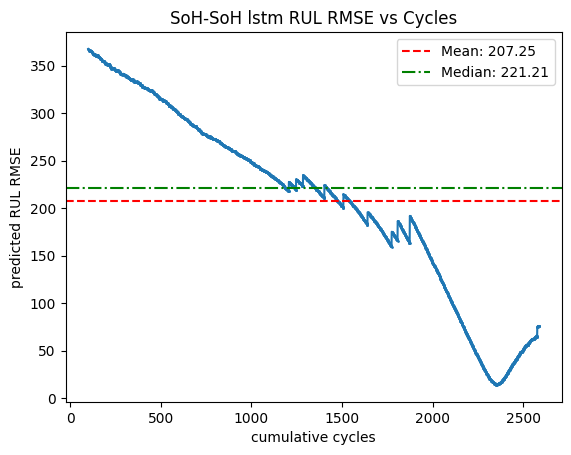

In [68]:
#Plot rmse per cycle use log scale
data = cycle_rmse

# Extract x and y values
x = list(data.keys())
y = list(data.values())

# Plot
plt.plot(x, y, marker='o',markersize=1)
plt.xlabel('cumulative cycles')
plt.ylabel('predicted RUL RMSE')
plt.title('SoH-SoH lstm RUL RMSE vs Cycles')
#plt.yscale('symlog')
plt.grid(False)
# Calculate Mean and Median
mean_val = np.mean(y)
median_val = np.median(y)
# Add lines for mean and median
plt.axhline(y=mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axhline(y=median_val, color='g', linestyle='-.', label=f'Median: {median_val:.2f}')
plt.legend()
plt.show()

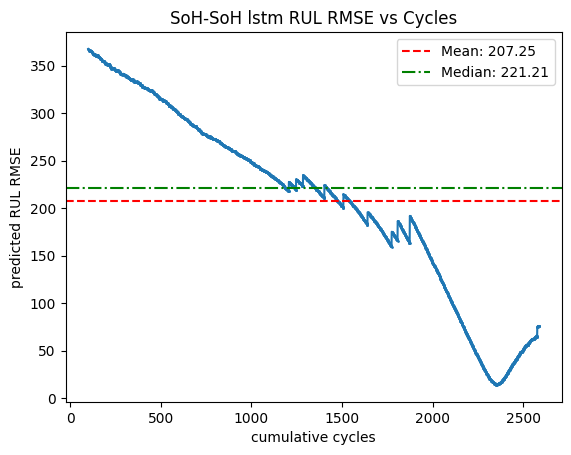

In [69]:
#Plot rmse per cycle use log scale
data = cycle_rmse

# Extract x and y values
x = list(data.keys())
y = list(data.values())

# Plot
plt.plot(x, y, marker='o',markersize=1)
plt.xlabel('cumulative cycles')
plt.ylabel('predicted RUL RMSE')
plt.title('SoH-SoH lstm RUL RMSE vs Cycles')
#plt.yscale('symlog')
plt.grid(False)
# Calculate Mean and Median
mean_val = np.mean(y)
median_val = np.median(y)
# Add lines for mean and median
plt.axhline(y=mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axhline(y=median_val, color='g', linestyle='-.', label=f'Median: {median_val:.2f}')
plt.legend()
plt.show()

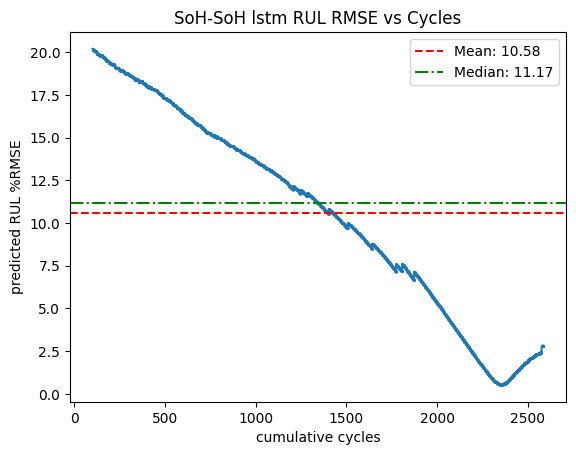

In [74]:
#Plot rmse per cycle use log scale
data = cycle_nrmse

# Extract x and y values
x = list(data.keys())
y = list(data.values())

# Plot
plt.plot(x, y, marker='o',markersize=1)
plt.xlabel('cumulative cycles')
plt.ylabel('predicted RUL %RMSE')
plt.title('SoH-SoH lstm RUL RMSE vs Cycles')
#plt.yscale('symlog')
plt.grid(False)
# Calculate Mean and Median
mean_val = np.mean(y)
median_val = np.median(y)
# Add lines for mean and median
plt.axhline(y=mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axhline(y=median_val, color='g', linestyle='-.', label=f'Median: {median_val:.2f}')
plt.legend()
plt.show()

In [75]:
model

LSTMModel(
  (lstm): LSTM(1, 64, batch_first=True)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)

# 3. GILSTM

## 3a. LSTMs that predict k,a and b from SoH, then use the inverse gompertz eqn to calculate RUL

In [73]:
## Use NNs from BatteryML but the input is a particular length of cycles eg 100 (similar to BatteryML) or 500, 1000 to improve the accuracy and the output is k,a and b. Here usage of dy/dx may be crucial.


## 3b. LSTMs that predict SoH from SoH then pass the predicted curve through a gompertz fitting model and calculate rul using the inverse gompertz eqn 

In [72]:
## use models from 2b to accomplish this.